In [16]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Step 2: Load and Clean the Dataset
df = pd.read_csv("Credit Card.csv")
print(df)

            ID Customer_ID      Month             Name   Age          SSN  \
0       0x160a   CUS_0xd40  September    Aaron Maashoh    23  821-00-0265   
1       0x160b   CUS_0xd40    October    Aaron Maashoh    24  821-00-0265   
2       0x160c   CUS_0xd40   November    Aaron Maashoh    24  821-00-0265   
3       0x160d   CUS_0xd40   December    Aaron Maashoh   24_  821-00-0265   
4       0x1616  CUS_0x21b1  September  Rick Rothackerj    28  004-07-5839   
...        ...         ...        ...              ...   ...          ...   
49995  0x25fe5  CUS_0x8600   December   Sarah McBridec  4975  031-35-0942   
49996  0x25fee  CUS_0x942c  September            Nicks    25  078-73-5990   
49997  0x25fef  CUS_0x942c    October            Nicks    25  078-73-5990   
49998  0x25ff0  CUS_0x942c   November            Nicks    25  078-73-5990   
49999  0x25ff1  CUS_0x942c   December            Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  .

In [18]:
print(df.isnull().sum())
#print(df.describe())
print(df.info())

# Drop rows where 'Name' column is empty, contains only spaces, or is NaN
df = df[~df['Name'].isin(['', ' ', np.nan])]
df.dropna(subset=['Name'], inplace=True)

# Clean 'Age' column: remove non-digit characters, convert to float, fill with median

# Extract digits from Age column safely using raw string
df['Age'] = df['Age'].astype(str).str.extract(r'(\d+)').astype(float)

df['Age'].fillna(df['Age'].median(), inplace=True)

# Clean 'SSN': Replace invalid SSNs with NaN
df['SSN'] = df['SSN'].apply(lambda x: x if re.match(r'^\d{3}-\d{2}-\d{4}$', str(x)) else np.nan)

# Clean 'Occupation': Replace underscores, hyphens, blanks, or NaNs with 'Unknown'
df['Occupation'] = df['Occupation'].replace(['_______', '-', '', np.nan], 'Unknown')

# Clean 'Credit_History_Age': Keep as is, fill NaNs with 'Unknown'
df['Credit_History_Age'] = df['Credit_History_Age'].fillna('Unknown')

# Clean 'Type_of_Loan': Replace blanks, hyphens, underscores, or NaNs with 'Not Specified'
df['Type_of_Loan'] = df['Type_of_Loan'].replace(['_', '-', '', np.nan], 'Not Specified')

# Convert monetary columns to numeric and fill NaNs with median
monetary_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt',
                 'Changed_Credit_Limit', 'Monthly_Balance', 'Amount_invested_monthly']
for col in monetary_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)

# Clean 'Num_of_Loan': Convert to numeric, fix negatives/outliers, fill with median
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df.loc[(df['Num_of_Loan'] < 0) | (df['Num_of_Loan'] > 20), 'Num_of_Loan'] = np.nan
df['Num_of_Loan'].fillna(df['Num_of_Loan'].median(), inplace=True)
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

# Clean 'Num_of_Delayed_Payment': Convert to numeric, fill with median
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median(), inplace=True)

# Clean 'Num_Credit_Inquiries': Convert to numeric and fill with median
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True)

# Normalize categorical fields
df['Credit_Mix'] = df['Credit_Mix'].replace({'_': 'Unknown'}).fillna('Unknown')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(
    {'NM': 'No', '_': 'Unknown'}).fillna('Unknown')
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('_', 'Unknown').fillna('Unknown')

# Drop rows with missing SSN (optional: keep if needed)
df.dropna(subset=['SSN'], inplace=True)

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Final check
print("✅ Data cleaning complete. Shape:", df.shape)

print(df)
print(df.isnull().sum())

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 

C:\Users\parva\AppData\Local\Temp\ipykernel_13752\3689080760.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\parva\AppData\Local\Temp\ipykernel_13752\3689080760.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

✅ Data cleaning complete. Shape: (42438, 27)
            ID Customer_ID      Month             Name     Age          SSN  \
0       0x160a   CUS_0xd40  September    Aaron Maashoh    23.0  821-00-0265   
1       0x160b   CUS_0xd40    October    Aaron Maashoh    24.0  821-00-0265   
2       0x160c   CUS_0xd40   November    Aaron Maashoh    24.0  821-00-0265   
3       0x160d   CUS_0xd40   December    Aaron Maashoh    24.0  821-00-0265   
4       0x1616  CUS_0x21b1  September  Rick Rothackerj    28.0  004-07-5839   
...        ...         ...        ...              ...     ...          ...   
42433  0x25fe5  CUS_0x8600   December   Sarah McBridec  4975.0  031-35-0942   
42434  0x25fee  CUS_0x942c  September            Nicks    25.0  078-73-5990   
42435  0x25fef  CUS_0x942c    October            Nicks    25.0  078-73-5990   
42436  0x25ff0  CUS_0x942c   November            Nicks    25.0  078-73-5990   
42437  0x25ff1  CUS_0x942c   December            Nicks    25.0  078-73-5990   

      

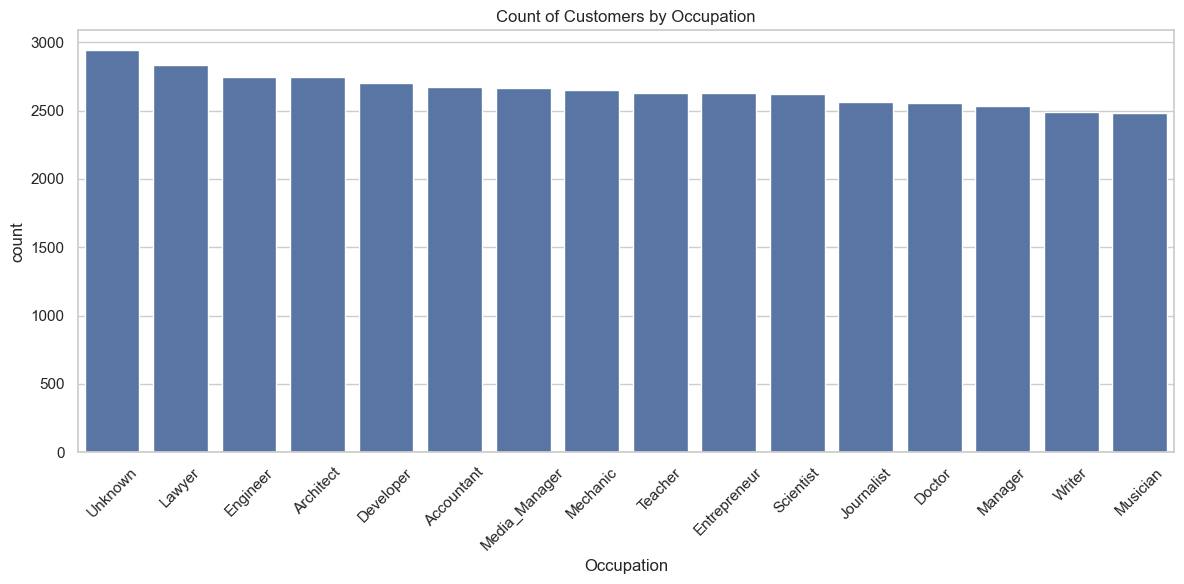

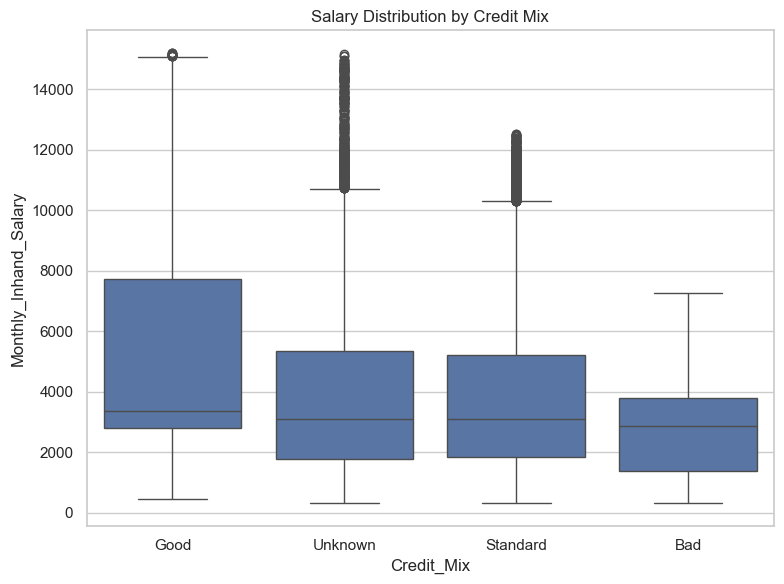

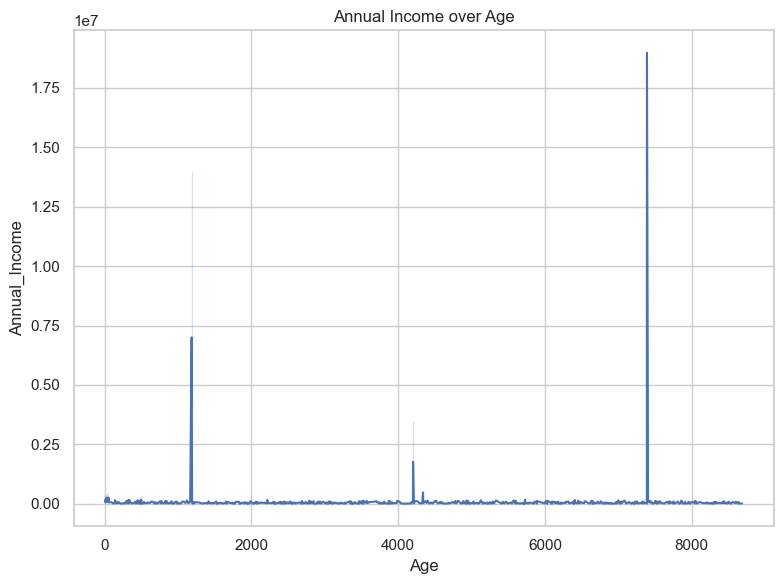

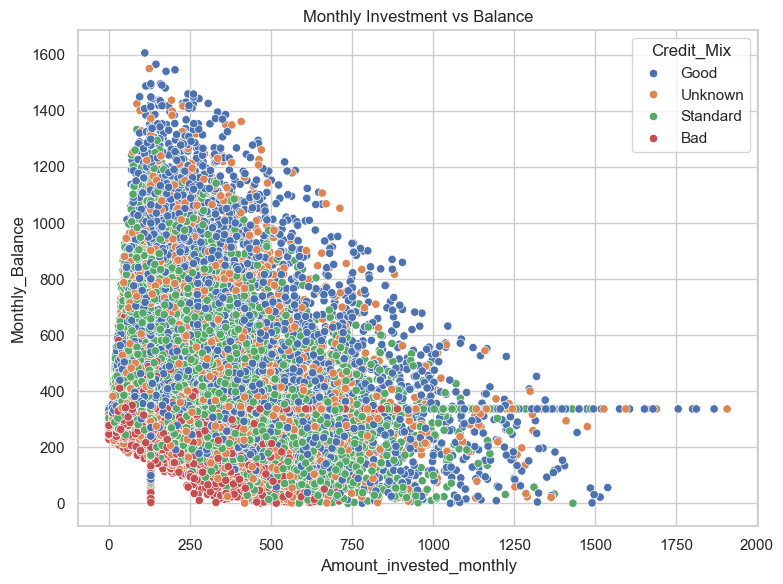

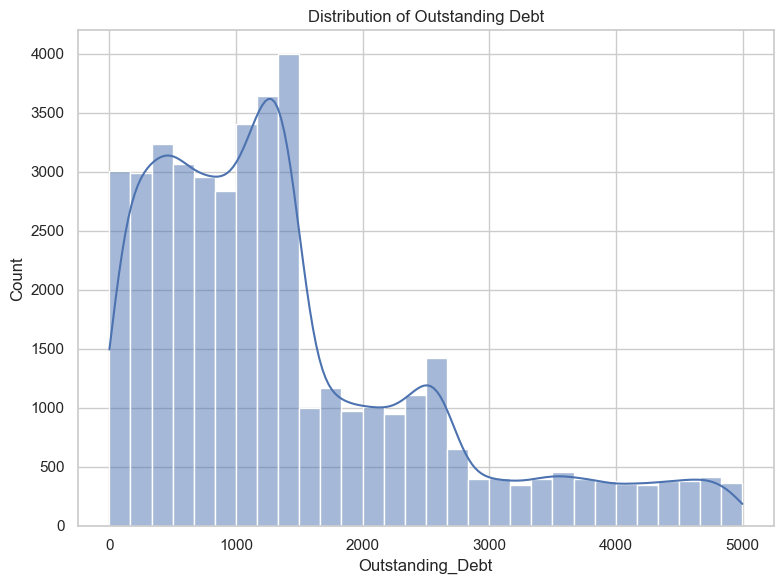

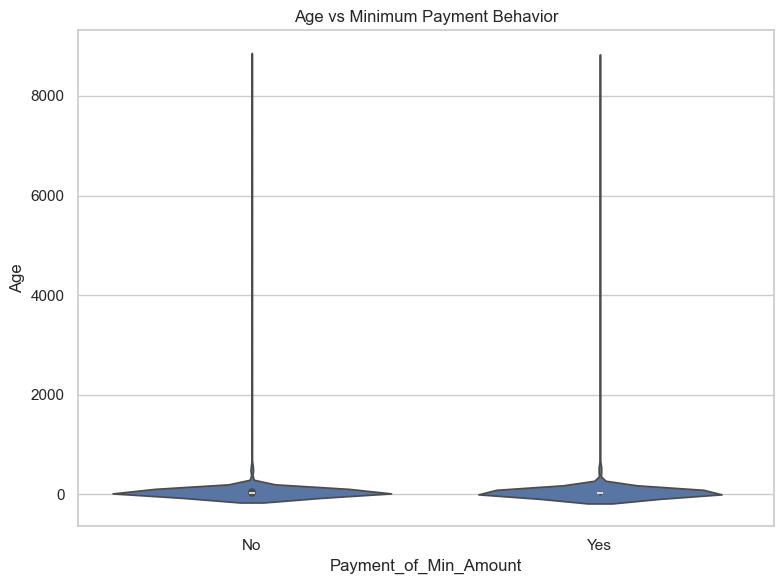

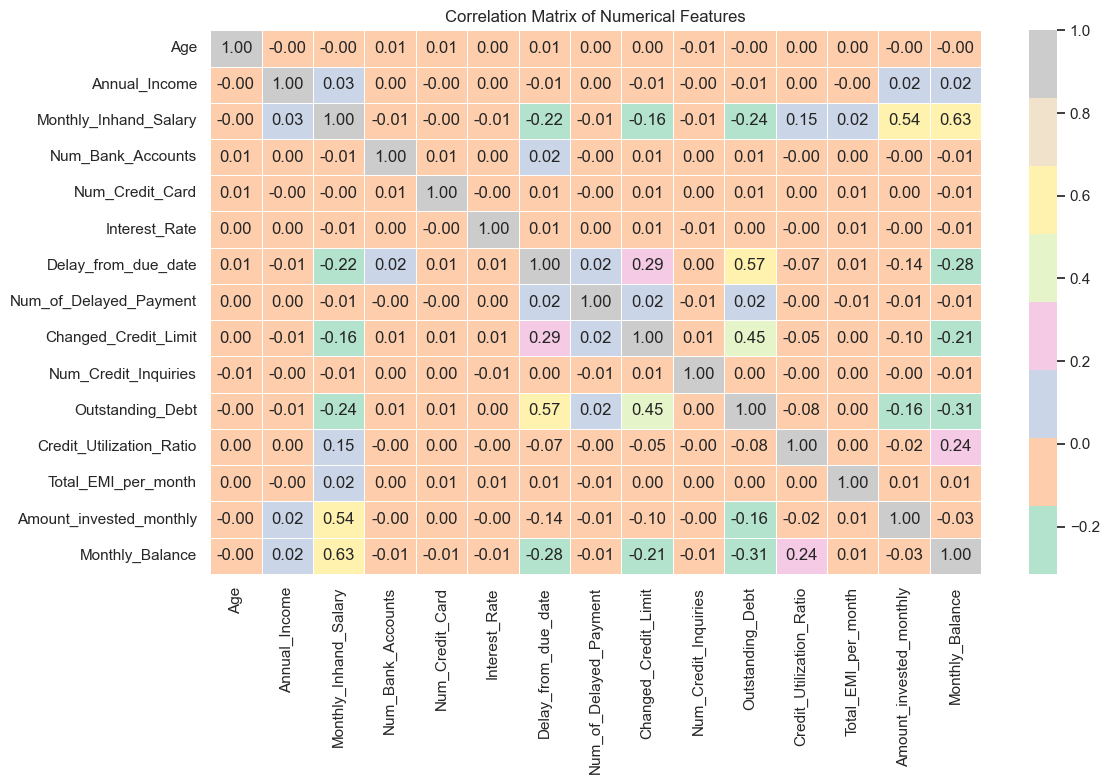

In [10]:
# Exploratory Data Analysis (EDA) using Seaborn and Matplotlib

# Set style
sns.set(style="whitegrid")

# 1. Countplot – Occupation
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Occupation', order=df['Occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count of Customers by Occupation')
plt.tight_layout()
plt.show()

# 2. Boxplot – Monthly Salary by Credit Mix
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Credit_Mix', y='Monthly_Inhand_Salary')
plt.title('Salary Distribution by Credit Mix')
plt.tight_layout()
plt.show()

# 3. Lineplot – Age vs. Annual Income
plt.figure(figsize=(8, 6))
sns.lineplot(data=df.sort_values('Age'), x='Age', y='Annual_Income')
plt.title('Annual Income over Age')
plt.tight_layout()
plt.show()

# 4. Scatterplot – Investment vs. Balance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Amount_invested_monthly', y='Monthly_Balance', hue='Credit_Mix')
plt.title('Monthly Investment vs Balance')
plt.tight_layout()
plt.show()

# 5. Histogram – Outstanding Debt
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Outstanding_Debt', kde=True, bins=30)
plt.title('Distribution of Outstanding Debt')
plt.tight_layout()
plt.show()

# 6. Violin Plot – Age by Payment Behavior
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Payment_of_Min_Amount', y='Age')
plt.title('Age vs Minimum Payment Behavior')
plt.tight_layout()
plt.show()

# 7. Correlation Heatmap
plt.figure(figsize=(12, 8))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='Pastel2', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [19]:
#Linear Regression 

# Select features and target
X = df[['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt']]
y = df['Monthly_Balance']

# Handle missing values if any
X = X.fillna(0)
y = y.fillna(0)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.4225558910173698
RMSE: 161.70393731504913


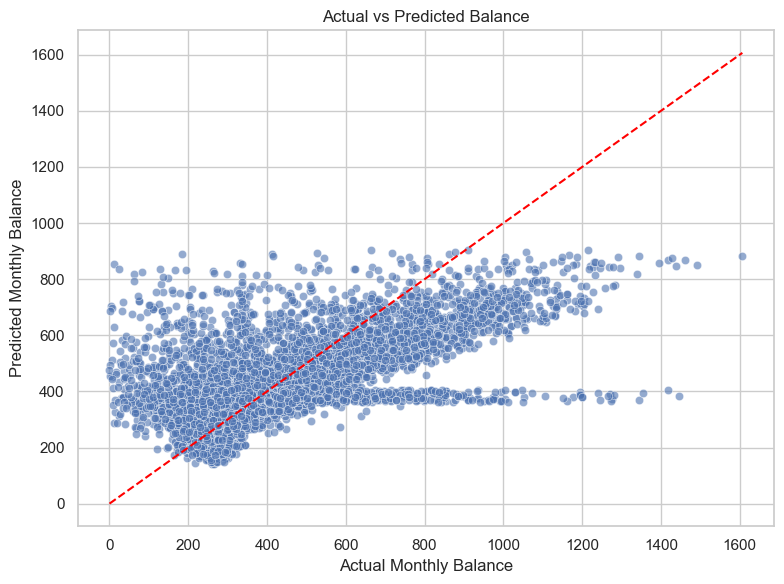

In [20]:
# 1. Regression Line (Predicted vs Actual)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Monthly Balance")
plt.ylabel("Predicted Monthly Balance")
plt.title("Actual vs Predicted Balance")
plt.tight_layout()
plt.show()

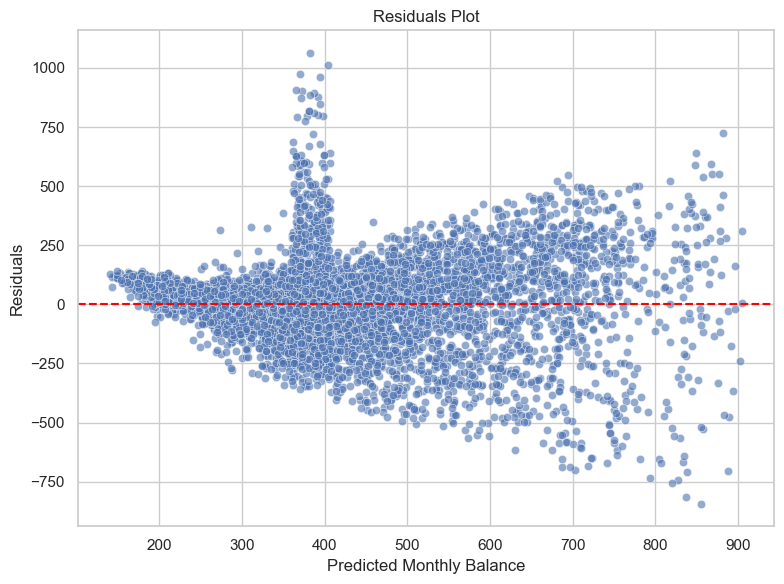

In [21]:
# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Monthly Balance")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.tight_layout()
plt.show()

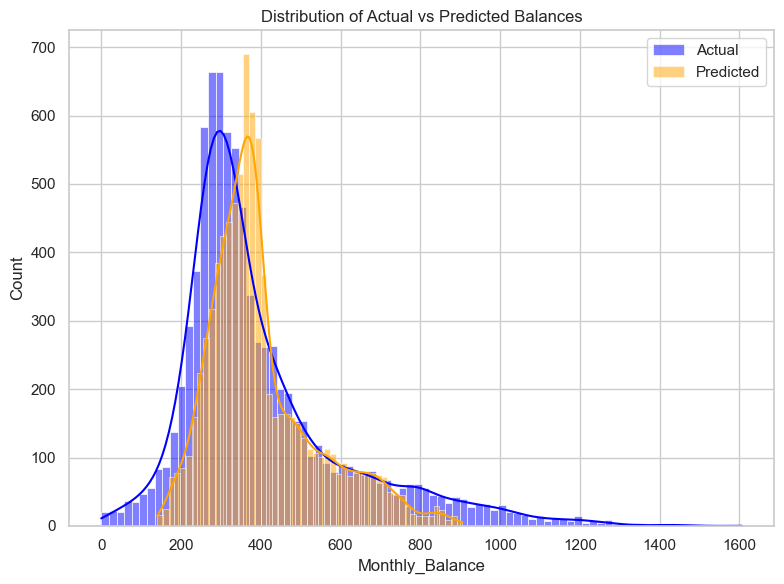

In [22]:
# 3. Histogram of Predictions vs Actual
plt.figure(figsize=(8, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True)
sns.histplot(y_pred, color='orange', label='Predicted', kde=True)
plt.title("Distribution of Actual vs Predicted Balances")
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
print(df.to_csv("Credit_Card processed.csv", index=False))

None
